## Analysis and Visualization of 
# Income Disparities around the world

from 1978 - 2007

In [28]:
import pandas as pd
import numpy as np
import cufflinks as cf


%matplotlib inline
from matplotlib import pyplot as plt
from scipy import stats
import seaborn as sns
import plotly.plotly as py
import plotly.tools as tls
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

import plotly.graph_objs as go
from dash.dependencies import Input, Output

In [29]:
init_notebook_mode(connected=True)

Reading Datafiles from www.gapminder.com

GINI ratio - 100(1) = maximal inequality *BAD*;
                 0  = absolutely equal *GOOD*

In [30]:

high10 = pd.read_excel('incomedashboard/dependencies/Indicator_Income share held by highest 10%.xlsx', index_col=0)
high20 = pd.read_excel('incomedashboard/dependencies/Indicator_Income share held by highest 20%.xlsx', index_col=0)
sec20 = pd.read_excel('incomedashboard/dependencies/Indicator_Income share held by second 20%.xlsx', index_col=0)
thi20 = pd.read_excel('incomedashboard/dependencies/Indicator_Income share held by third 20%.xlsx', index_col=0)
four20 = pd.read_excel('incomedashboard/dependencies/Indicator_Income share held by fourth 20%.xlsx', index_col=0)
low20 = pd.read_excel('incomedashboard/dependencies/indicator SI_DST_FRST_20.xls.xlsx', index_col=0)
low10 = pd.read_excel('incomedashboard/dependencies/Indicator_Income share held by lowest 10%.xlsx', index_col=0)


num_bill = pd.read_excel('incomedashboard/dependencies/Indicator_number of billionaires.xlsx', index_col=0)
rel_num_bill = pd.read_excel('incomedashboard/dependencies/Indicator_Number of billionaires per 1 million inhabitants.xlsx', index_col=0)
avg_age_bill = pd.read_excel('incomedashboard/dependencies/Indicator_Average age.xlsx', index_col=0)

gini = pd.read_excel('incomedashboard/dependencies/indicator SI_POV_GINI.xls.xlsx', index_col=0)

* mean per country - quartiles    the most unequal, poorest, richest countries of the world 

* histograms

* might have to bin countries together to continents


In [31]:
shigh20 = high20.stack()
ssec20 = sec20.stack()
sthi20 = thi20.stack()
sfour20 = four20.stack()
slow20 = low20.stack()

d = {'%inc_highest20': shigh20, '%inc_second20': ssec20, '%inc_third20': sthi20, '%inc_fourth20': sfour20, '%inc_low20': slow20}
df_inc = pd.DataFrame(data=d).reset_index()
df_inc = df_inc.rename(columns={'Income share held by highest 20%': 'country', 'level_1': 'year'}).set_index('country')
df_inc[['%inc_highest20', '%inc_second20', '%inc_third20', '%inc_fourth20', '%inc_low20']] = round(df_inc[['%inc_highest20', '%inc_second20', '%inc_third20', '%inc_fourth20', '%inc_low20']])

In [32]:
df_inc.head()

,year,%inc_highest20,%inc_second20,%inc_third20,%inc_fourth20,%inc_low20
country,,,,,,
Albania,1997,38.0,13.0,17.0,23.0,9.0
Albania,2002,37.0,13.0,18.0,23.0,9.0
Albania,2005,41.0,12.0,17.0,23.0,8.0
Algeria,1988,47.0,11.0,15.0,21.0,7.0
Algeria,1995,42.0,12.0,16.0,23.0,7.0


In [33]:
snum = num_bill.stack()
srel = rel_num_bill.stack()
savg = avg_age_bill.stack()

d = {'count billionaires': snum, 'number of billionaires per 1 million': srel, 'average age billionaires': savg}
df2 = pd.DataFrame(data=d).reset_index()
df2 = df2.rename(columns={'Total number of billionaires': 'country', 'level_1': 'year'}).set_index('country')
df2 = df2[df2['count billionaires'] != 0]
df2['average age billionaires'] = [int(i) for i in df2['average age billionaires']]

In [34]:
GD = gini.transpose().dropna(1, how='all')

In [35]:
d = {'Argentina': 'South America', 'Australia': 'Australia', 'Austria': 'Europe', 'Belgium': 'Europe', 'Brazil': 'South America', 'Canada': 'North America', 'Chile': 'South America', 'China': 'Asia', 'Colombia': 'South America', 'Cyprus': 'Asia', 'Czech Rep.': 'Europe', 'Denmark': 'Europe', 'Egypt': 'Africa', 'France': 'Europe', 'Germany': 'Europe', 'Greece': 'Europe', 'Hong Kong, China': 'Asia', 'Iceland': 'Europe', 'India': 'Asia', 'Indonesia': 'Asia', 'Ireland': 'Europe', 'Israel': 'Asia', 'Italy': 'Europe', 'Japan': 'Asia', 'Kazakhstan': 'Asia', 'Korea Rep.': 'Asia', 'Kuwait': 'Asia', 'Lebanon': 'Asia', 'Liechtenstein': 'Europe', 'Malaysia': 'Asia', 'Mexico': 'North America', 'Monaco': 'Europe', 'Netherlands': 'Europe', 'New Zealand': 'Australia', 'Norway': 'Europe', 'Oman': 'Asia', 'Philippines': 'Asia', 'Poland': 'Europe', 'Portugal': 'Europe', 'Romania': 'Europe', 'Russia':'Europe', 'Saudi Arabia': 'Asia', 'Serbia': 'Europe', 'Singapore': 'Asia', 'South Africa': 'Africa', 'Spain': 'Europe', 'Sweden': 'Europe', 'Switzerland': 'Europe', 'Taiwan': 'Asia', 'Thailand': 'Asia', 'Turkey': 'Asia', 'Ukraine': 'Europe', 'United Arab Emirates': 'Asia', 'United Kindom': 'Europe', 'United States': 'North America', 'Venezuela': 'South America'}
a = {'Argentina': 'ARG', 'Australia':'AUS', 'Austria':'AUT', 'Belgium':'BEL', 'Brazil':'BRA', 'Canada':'CAN', 'Chile':'CHL', 'China':'CHN', 'Colombia':'COL', 'Cyprus':'CYP', 'Czech Republic':'CZE', 'Denmark':'DNK', 'Egypt':'EGY', 'France':'FRA', 'Germany':'DEU', 'Greece':'GRC', 'Hong Kong, China':'CHN', 'Iceland':'ISL', 'India':'IND', 'Indonesia':'IDN', 'Ireland':'IRL', 'Israel':'ISR', 'Italy':'ITA', 'Japan':'JPN', 'Kazakhstan':'KAZ', 'Korea Rep.':'KOR','Kuwait':'KWT', 'Lebanon':'LBN', 'Liechtenstein':'LIE', 'Malaysia':'MYS', 'Mexico':'MEX', 'Monaco':'MCO', 'Netherlands':'NLD', 'New Zealand':'NZL', 'Norway':'NOR', 'Oman':'OMN', 'Phillippines':'PHL', 'Poland':'POL', 'Portugal':'PRT', 'Romania':'ROU', 'Russia':'RUS', 'Saudi Arabia':'SAU', 'Serbia':'SRB', 'Singapore':'SGP', 'South Africa':'ZAF', 'Spain':'ESP', 'Sweden':'SWE', 'Switzerland': 'CHE', 'Taiwan':'TWN', 'Thailand':'THA', 'Turkey':'TUR', 'Ukrain':'UKR', 'UnitedArab Emirates':'ARE', 'United Kingdom':'GBR', 'United States':'USA', 'Venezuela':'VEN'}
d = pd.DataFrame(data=d, index=range(len(d))).transpose()[0]
a = pd.DataFrame(data=a, index=range(len(a))).transpose()[0]
df = pd.DataFrame(d)
a = pd.DataFrame(a)
df.columns = ['continents']
a.columns=['code']
df_inc = df_inc.merge(df, left_index=True, right_index=True).dropna()
df_inc = df_inc.merge(a,left_index=True, right_index=True)
GDc = pd.DataFrame(data={'gini':GD.stack()}).reset_index()
GDc = GDc.rename(columns={'GINI index': 'country', 'level_0': 'year'})
GDc.set_index(['country'], inplace=True)
GDc = GDc.merge(a, left_index=True, right_index=True).reset_index()
GDc.set_index(['index'], inplace=True)
GDc = GDc.merge(df, left_index=True, right_index=True).reset_index()

In [36]:
GDc.head()

,index,year,gini,code,continents
0,Argentina,1986,42.79,ARG,South America
1,Argentina,1987,45.28,ARG,South America
2,Argentina,1991,46.61,ARG,South America
3,Argentina,1992,45.48,ARG,South America
4,Argentina,1993,44.89,ARG,South America


In [37]:
v = GDc[['continents', 'gini', 'index', 'year']].dropna().set_index('continents')
trace1 = dict(x = list(v['year']),
y = list(v['gini']),
text = list(v['index']),
type = 'scatter',
mode = 'markers')

In [38]:
GDc[GDc['year'] == '2000']['index'].head()

11    Argentina
31      Austria
32      Belgium
51       Brazil
62       Canada
Name: index, dtype: object

In [39]:
def update_choro(input_data):
    n = input_data
    data_ch = (go.Choropleth(locations=GDc[GDc['year'] == n]['code'],
                             z=GDc[GDc['year'] == n]['gini'],
                             text=GDc[GDc['year'] == n]['index'],
                             marker=go.choropleth.Marker(
                                 line=go.choropleth.marker.Line(color='rgb(180,180,180)', width=0.5))),)

    layout_ch = dict(title='GINI index worldwide', showlegend=True, legend=GDc['gini'], hovermode='closest',
                     geo=go.layout.Geo(showframe=False,
                                       projection=go.layout.geo.Projection(type='equirectangular')),
                     annotations=[go.layout.Annotation(x=0.55, y=0.1, xref='paper', yref='paper',
                                                       text=str(n), showarrow=False)])
    return [dict(data=data_ch, layout=layout_ch)]

In [40]:
sorted(list(GDc['year'].unique())[:-1])[1:]

['1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010']

In [41]:

GD_list = list(GD.transpose().index)
GDt = GD.transpose().reset_index()

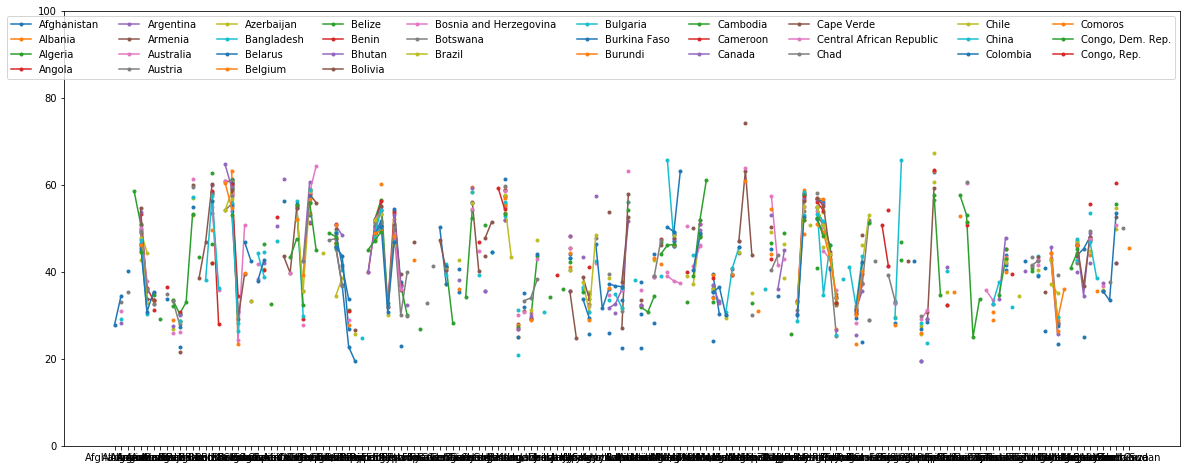

In [42]:
plt.figure(figsize=(20,8))
plt.plot(GD.transpose(), marker='.', animated=True)
plt.legend(GD_list, ncol=10)
plt.ylim(0, 100)
plt.show()

* group countries by continent
* make movable plot through years

In [43]:
#sns.pairplot(GDt)

In [63]:
gini_years = GDt.columns[3:]

year = '2000'
a = GDt[[year, 'GINI index']].dropna()
trace = dict(x=list(a[year]), y=list(a['GINI index']), text=list(a['GINI index']), type='bar')


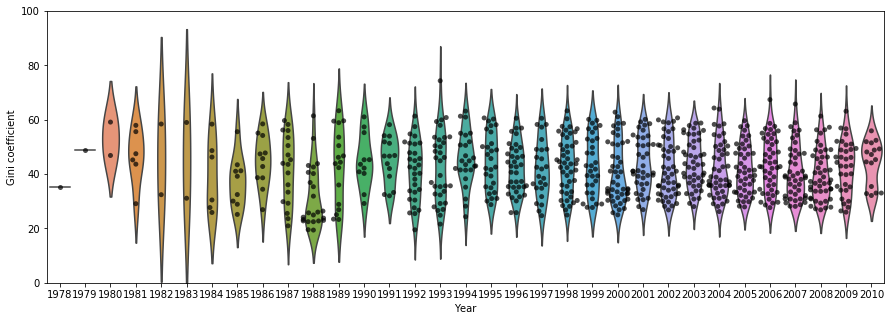

In [9]:
plt.figure(figsize=(15,5))
sns.violinplot(data=GDt, inner=None)
sns.swarmplot(data=GDt, color='k', alpha=0.7)
plt.ylim(0,100)
plt.ylabel('Gini coefficient')
plt.xlabel('Year')
plt.show()

In [41]:
gini_countries = list(GDt['GINI index'])
GDr = GD.reset_index()
l = pd.Series([float(i) for i in GDr['index'].values])

GDr = GDr.replace(GDr['index'], l).set_index('index')
GDt = GDr.transpose().reset_index()

In [42]:
year_value = []
ann_text = []
for i in range(157):
    values = GDt.loc[i].dropna()
    years = GDt.loc[i].dropna().index
    for value in values[1:]:
        for year in years[1:]:
            year_value.append([year, value])
            ann_text.append(values[0])

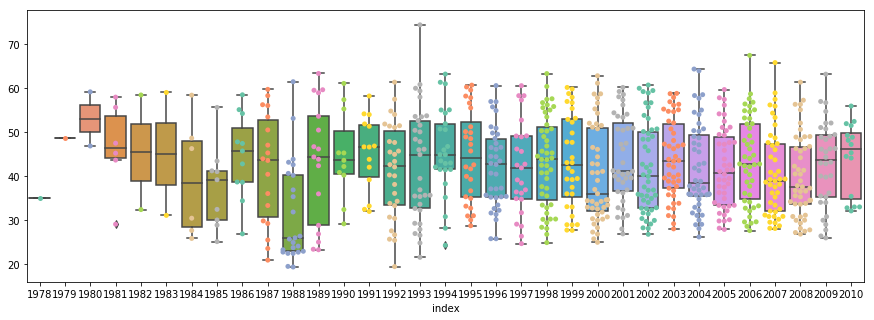

In [43]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot()
ax2 = fig.add_subplot()

box = sns.boxplot(data=GDt, ax=ax1)
swarm = sns.swarmplot(data=GDt, palette='Set2', ax=ax2)
plt.show()

Text(0.5, 1.0, 'standart deviation per year')

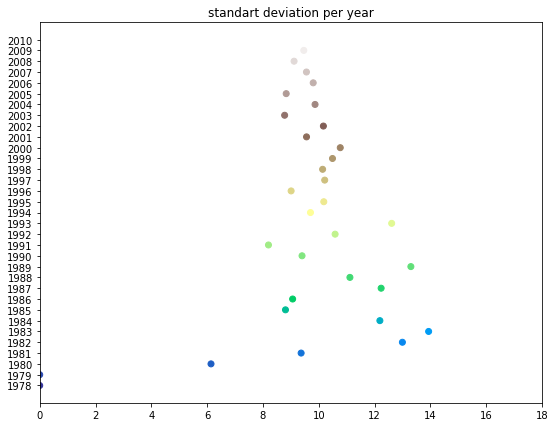

In [44]:
std = np.std(GDt)
labels = std.index[::2]
year_GD = GDt.set_index('GINI index').transpose().reset_index()

plt.figure(figsize=(9,7))
plt.scatter(std, year_GD['index'], cmap='terrain', c=range(33))
plt.xlim(0,18)
plt.title('standart deviation per year')

In [45]:
cf.go_offline()

In [58]:
std = pd.DataFrame(std, columns=['val']).reset_index()
cf.colors.scales()

Kind of chart

                               scatter
                               bar
                               box
                               spread
                               ratio
                               heatmap
                               surface
                               histogram
                               bubble
                               bubble3d
                               scatter3d       
                               scattergeo
                               ohlc
                               candle
                               pie
                               choroplet 

In [71]:
GD = GDt.set_index('GINI index')
#GDt.hist()
#sns.violinplot(GD)


In [72]:
#getting aquainted with plotly

import plotly.graph_objs as go

fig = go.FigureWidget()
fig.add_scatter(y=[2, 1, 4, 3])
fig.add_bar(y=[1, 4, 3, 2])
fig.layout.title = 'Hello FigureWidget'
fig

FigureWidget({
    'data': [{'type': 'scatter', 'uid': '9ecde9a2-4f09-4337-a72b-4809efad4473', 'y': [2, 1, 4, …

In [65]:
df_inc.head()

,year,%inc_highest20,%inc_second20,%inc_third20,%inc_fourth20,%inc_low20,continents,code
Argentina,1986,50.0,9.0,14.0,22.0,5.0,South America,ARG
Argentina,1992,50.0,9.0,14.0,22.0,5.0,South America,ARG
Argentina,1996,53.0,8.0,14.0,21.0,4.0,South America,ARG
Argentina,1998,54.0,8.0,13.0,22.0,4.0,South America,ARG
Argentina,2002,57.0,7.0,12.0,21.0,3.0,South America,ARG


In [86]:
df = df_inc[['year', '%inc_highest20', '%inc_second20', '%inc_third20','%inc_fourth20','%inc_low20', 'continents']]

In [87]:
df.reset_index(inplace=True)
df = df.dropna()

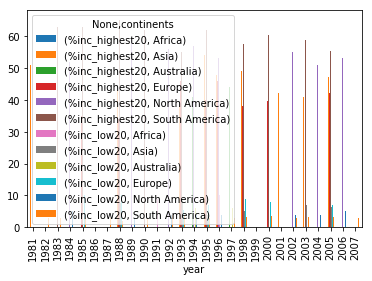

In [103]:
df.groupby(['year', 'continents'])[['%inc_highest20', '%inc_low20']].mean().unstack().plot(kind='bar')